### Importing Required Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings('ignore')

### Mounting the Google drive folder

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
%cd /content/drive/MyDrive/CourseProject

/content/drive/MyDrive/CourseProject


### Reading the Data File

In [7]:
df = pd.read_csv('./Indian_housing_Delhi_data.csv')
df.head(10)

,house_type,house_size,location,city,latitude,longitude,price,currency,numBathrooms,numBalconies,isNegotiable,priceSqFt,verificationDate,description,SecurityDeposit,Status
0,1 RK Studio Apartment,400 sq ft,Kalkaji,Delhi,28.545561,77.254349,22000,INR,1.0,NaN,NaN,NaN,Posted a day ago,"Fully furnished, loaded with amenities & gadge...",No Deposit,Furnished
1,1 RK Studio Apartment,400 sq ft,Mansarover Garden,Delhi,28.643259,77.132828,20000,INR,1.0,NaN,NaN,NaN,Posted 9 days ago,Here is an excellent 1 BHK Independent Floor a...,No Deposit,Furnished
2,2 BHK Independent Floor,500 sq ft,Uttam Nagar,Delhi,28.618677,77.053352,8500,INR,1.0,NaN,NaN,NaN,Posted 12 days ago,"Zero Brokerage.\n\n2 Room set, Govt bijali Met...",No Deposit,Semi-Furnished
3,3 BHK Independent House,"1,020 sq ft",Model Town,Delhi,28.712898,77.180000,48000,INR,3.0,NaN,NaN,NaN,Posted a year ago,Itâs a 3 bhk independent house situated in M...,No Deposit,Furnished
4,2 BHK Apartment,810 sq ft,Sector 13 Rohini,Delhi,28.723539,77.131424,20000,INR,2.0,NaN,NaN,NaN,Posted a year ago,Well designed 2 bhk multistorey apartment is a...,No Deposit,Unfurnished
5,3 BHK Apartment,750 sq ft,DLF Farms,Delhi,28.488153,77.156975,11000,INR,1.0,NaN,NaN,NaN,Posted 2 years ago,Well designed 3 bhk multistorey apartment is a...,No Deposit,Semi-Furnished
6,3 BHK Independent Floor,"1,300 sq ft",laxmi nagar,Delhi,28.635509,77.269661,20000,INR,2.0,NaN,NaN,NaN,Posted 3 years ago,Itâs a 3 bhk builder floor situated in laxmi...,No Deposit,Furnished
7,3 BHK Independent Floor,"1,200 sq ft",Swasthya Vihar,Delhi,28.641640,77.284027,35000,INR,2.0,NaN,NaN,NaN,Posted 3 years ago,Well designed 3 bhk builder floor is available...,No Deposit,Furnished
8,3 BHK Independent House,"1,100 sq ft",Janakpuri,Delhi,28.621193,77.091026,39000,INR,2.0,NaN,NaN,NaN,Posted 3 years ago,A spacious 3 bhk independent house is availabl...,No Deposit,Semi-Furnished
9,4 BHK Independent Floor,"2,500 sq ft",Pitampura,Delhi,28.696100,77.125694,90000,INR,4.0,NaN,NaN,NaN,Posted 2 months ago,A spacious 4 bhk builder floor is available fo...,No Deposit,Semi-Furnished


In [8]:
df.shape

(5000, 16)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   house_type        5000 non-null   object 
 1   house_size        5000 non-null   object 
 2   location          5000 non-null   object 
 3   city              5000 non-null   object 
 4   latitude          5000 non-null   float64
 5   longitude         5000 non-null   float64
 6   price             5000 non-null   int64  
 7   currency          5000 non-null   object 
 8   numBathrooms      4975 non-null   float64
 9   numBalconies      2737 non-null   float64
 10  isNegotiable      179 non-null    object 
 11  priceSqFt         0 non-null      float64
 12  verificationDate  5000 non-null   object 
 13  description       4715 non-null   object 
 14  SecurityDeposit   5000 non-null   object 
 15  Status            5000 non-null   object 
dtypes: float64(5), int64(1), object(10)
memory

### Analysing the Missing values

In [10]:
#Analyse the missing values
feature_nan = [feature for feature in df.columns if df[feature].isnull().sum() >1]
for feature in feature_nan:
    print(f'The percentage of NaN values in {feature} is: {np.round(df[feature].isnull().mean()*100,3)} %')

The percentage of NaN values in numBathrooms is: 0.5 %
The percentage of NaN values in numBalconies is: 45.26 %
The percentage of NaN values in isNegotiable is: 96.42 %
The percentage of NaN values in priceSqFt is: 100.0 %
The percentage of NaN values in description is: 5.7 %


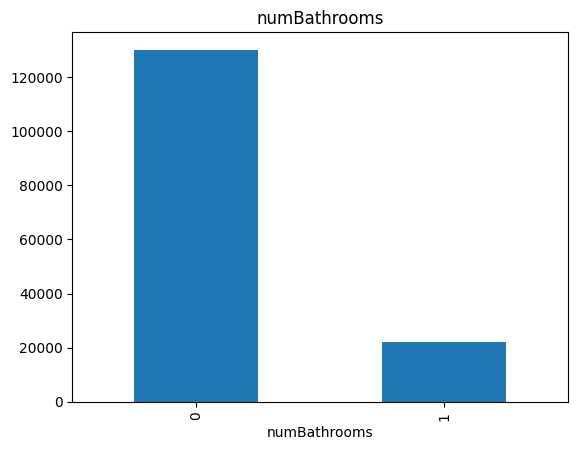

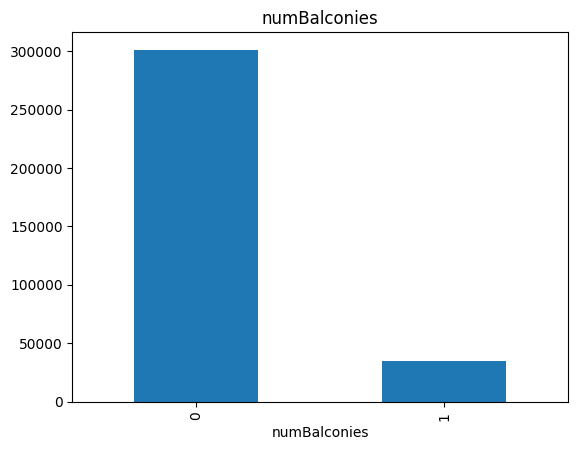

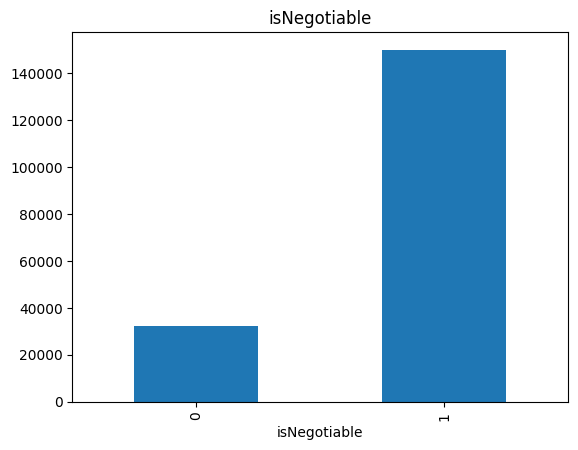

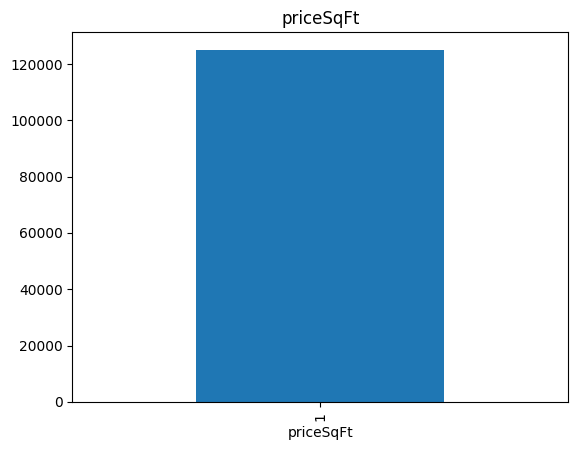

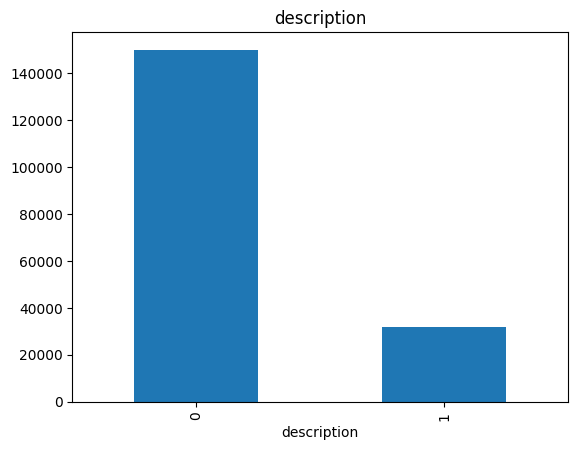

In [11]:
# Analysing Impact of NaN on Rent

for feature in feature_nan:
    data = df.copy()
    data[feature] = np.where(data[feature].isnull(),1,0)

    data.groupby(feature)['price'].median().plot(kind='bar')
    plt.title(feature)
    plt.show()


### Most of the features containing NaN have significant difference in rent price for both 0 and 1 categories and therefore should be handled instead of dropping. Except for priceSqFt that contains only NaN and can be dropped.

In [12]:
## Indetifying categorical and numerical features

numerical_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_feature = [feature for feature in df.columns if df[feature].dtype == 'O']

In [13]:
df[numerical_features].head()

,latitude,longitude,price,numBathrooms,numBalconies,priceSqFt
0,28.545561,77.254349,22000,1.0,NaN,NaN
1,28.643259,77.132828,20000,1.0,NaN,NaN
2,28.618677,77.053352,8500,1.0,NaN,NaN
3,28.712898,77.180000,48000,3.0,NaN,NaN
4,28.723539,77.131424,20000,2.0,NaN,NaN


In [14]:
df[categorical_feature].head()

,house_type,house_size,location,city,currency,isNegotiable,verificationDate,description,SecurityDeposit,Status
0,1 RK Studio Apartment,400 sq ft,Kalkaji,Delhi,INR,NaN,Posted a day ago,"Fully furnished, loaded with amenities & gadge...",No Deposit,Furnished
1,1 RK Studio Apartment,400 sq ft,Mansarover Garden,Delhi,INR,NaN,Posted 9 days ago,Here is an excellent 1 BHK Independent Floor a...,No Deposit,Furnished
2,2 BHK Independent Floor,500 sq ft,Uttam Nagar,Delhi,INR,NaN,Posted 12 days ago,"Zero Brokerage.\n\n2 Room set, Govt bijali Met...",No Deposit,Semi-Furnished
3,3 BHK Independent House,"1,020 sq ft",Model Town,Delhi,INR,NaN,Posted a year ago,Itâs a 3 bhk independent house situated in M...,No Deposit,Furnished
4,2 BHK Apartment,810 sq ft,Sector 13 Rohini,Delhi,INR,NaN,Posted a year ago,Well designed 2 bhk multistorey apartment is a...,No Deposit,Unfurnished


In [15]:
## Identifying and analysing numerical features that are dicrete or continuous.

discrete = [feature for feature in numerical_features if df[feature].nunique() < 25 and feature != 'priceSqFt']
continuous = [feature for feature in numerical_features if feature not in discrete and feature != 'priceSqFt' ]
print(f'Number of discrete columns: {discrete}')
print(f'Number of continuous columns: {continuous}')



Number of discrete columns: ['numBathrooms', 'numBalconies']
Number of continuous columns: ['latitude', 'longitude', 'price']


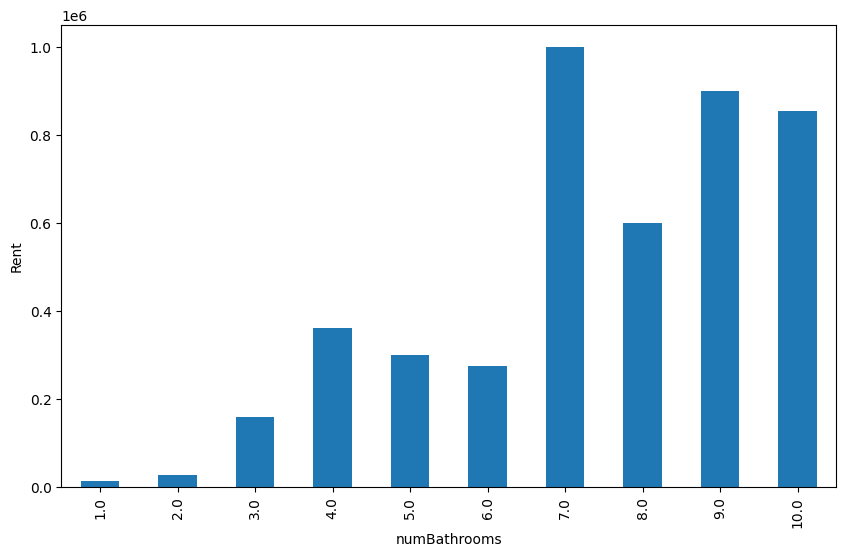

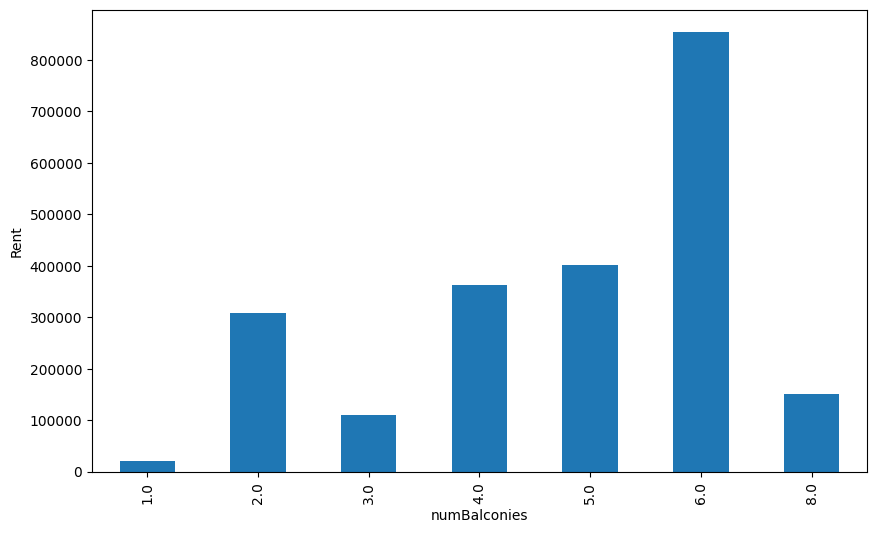

In [16]:
for feature in discrete:
    df.groupby(feature)['price'].median().plot(kind='bar',figsize=(10,6))
    plt.xlabel(feature)
    plt.ylabel('Rent')
    plt.show()

In [17]:
df[(df['numBalconies'] == 8.0) | (df['numBalconies'] == 6.0)]

,house_type,house_size,location,city,latitude,longitude,price,currency,numBathrooms,numBalconies,isNegotiable,priceSqFt,verificationDate,description,SecurityDeposit,Status
2695,5 BHK Villa,"6,521 sq ft",Gulmohar park,Delhi,28.557659,77.212486,401012,INR,4.0,6.0,NaN,NaN,Posted a year ago,Itâs a 5 bhk villa situated in Gulmohar park...,"10,10,202",Unfurnished
3961,9 BHK Independent House,"9,841 sq ft",Shanti Niketan,Delhi,28.577921,77.169373,1010102,INR,9.0,6.0,NaN,NaN,Posted 3 years ago,NaN,"30,10,111",Unfurnished
3964,10 BHK Independent House,"11,221 sq ft",Greater Kailash II,Delhi,28.531740,77.249138,854612,INR,10.0,6.0,NaN,NaN,Posted 3 years ago,NaN,"25,44,612",Unfurnished
4154,6 BHK penthouse,"3,500 sq ft",Sheikh Sarai Village,Delhi,28.534254,77.221458,150000,INR,6.0,8.0,Negotiable,NaN,Posted a month ago,This is a 6 BHK and 6 baths penthouse property...,"3,00,000",Furnished


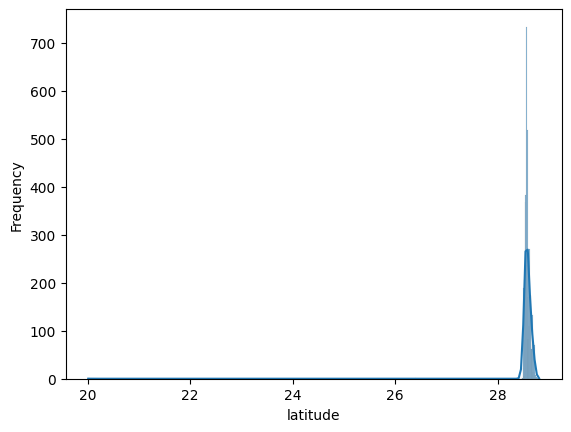

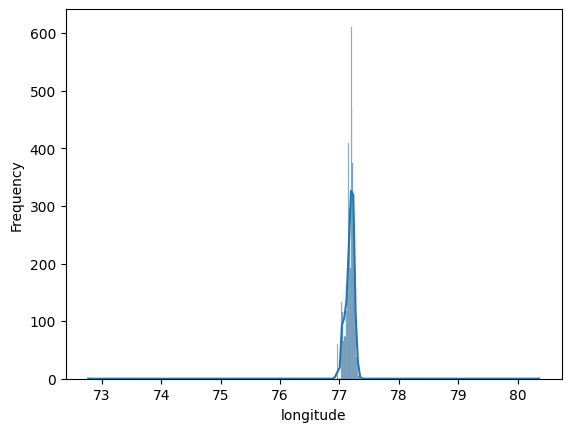

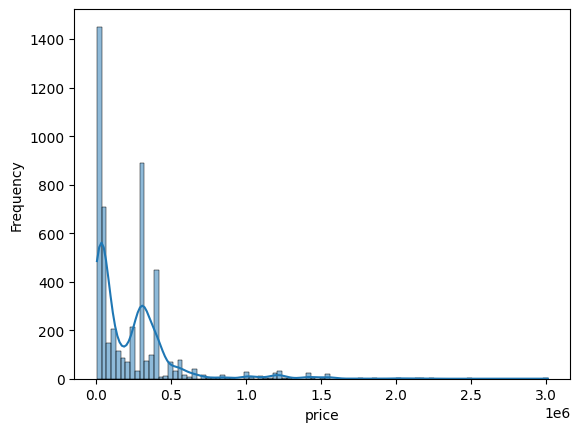

In [18]:
for feature in continuous:
    sns.histplot(data = df,x = feature,kde=True)
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

In [19]:
df[['latitude','longitude','price']].corr()

,latitude,longitude,price
latitude,1.000000,0.498180,-0.045589
longitude,0.498180,1.000000,0.133261
price,-0.045589,0.133261,1.000000


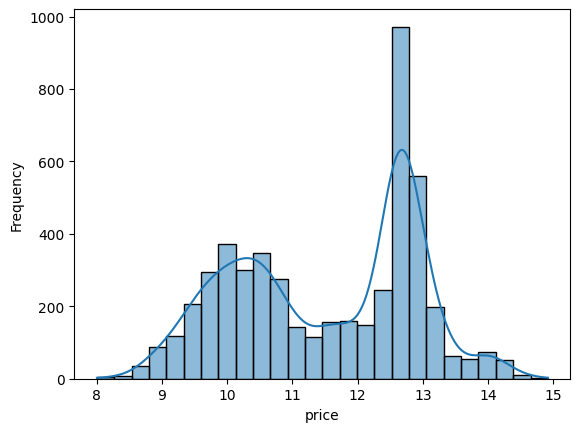

In [20]:
data = df.copy()
data['price'] = np.log(data['price'])
sns.histplot(data = data,x = 'price',kde=True)
plt.xlabel(feature)
plt.ylabel('Frequency')
plt.show()

In [21]:
## Analysing Cateorical Features

for feature in categorical_feature:
    print(f'Cardinality of {feature} is: {df[feature].nunique()}')

Cardinality of house_type is: 28
Cardinality of house_size is: 339
Cardinality of location is: 288
Cardinality of city is: 1
Cardinality of currency is: 1
Cardinality of isNegotiable is: 1
Cardinality of verificationDate is: 52
Cardinality of description is: 3820
Cardinality of SecurityDeposit is: 646
Cardinality of Status is: 3


In [22]:
## Outlier Detection

Q1,Q3= df['price'].quantile([0.25,0.75])

IQR = Q3-Q1

ub = Q3 + (1.5 * IQR)
lb = Q1 - (1.5 * IQR)

df[(df['price'] < lb) | (df['price'] > ub )]

,house_type,house_size,location,city,latitude,longitude,price,currency,numBathrooms,numBalconies,isNegotiable,priceSqFt,verificationDate,description,SecurityDeposit,Status
42,8 BHK Independent Floor,"7,200 sq ft",DLF Farms,Delhi,28.488153,77.156975,1400000,INR,8.0,NaN,NaN,NaN,Posted 3 years ago,Itâs a 8 bhk builder floor situated in DLF F...,No Deposit,Semi-Furnished
558,8 BHK Independent Floor,"7,200 sq ft",DLF Farms,Delhi,28.488153,77.156975,1400000,INR,8.0,NaN,NaN,NaN,Posted 3 years ago,Well designed 8 bhk builder floor is available...,No Deposit,Semi-Furnished
695,4 BHK Independent House,"7,000 sq ft",Central Ridge Reserve Forest,Delhi,28.606810,77.183601,2000000,INR,4.0,NaN,NaN,NaN,Posted 2 months ago,Itâs a 4 bhk independent house situated in C...,No Deposit,Semi-Furnished
940,7 BHK Independent Floor,"9,000 sq ft",Greater Kailash,Delhi,28.550154,77.241455,1000000,INR,7.0,NaN,NaN,NaN,Posted 16 days ago,A 7 bhk property is available for rental in Gr...,No Deposit,Semi-Furnished
973,10 BHK Independent House,"5,200 sq ft",Hauz Khas,Delhi,28.550165,77.196457,900000,INR,9.0,NaN,NaN,NaN,Posted 16 days ago,A spacious 10 bhk independent house is availab...,No Deposit,Semi-Furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4992,4 BHK Villa,"5,896 sq ft",Sunder Nagar,Delhi,28.618437,76.961784,1401100,INR,4.0,2.0,NaN,NaN,Posted 2 months ago,Its four bhk villa in the super location of De...,"45,20,105",Unfurnished
4993,4 BHK Villa,"5,896 sq ft",Sunder Nagar,Delhi,28.618437,76.961784,1202012,INR,4.0,2.0,NaN,NaN,Posted 2 months ago,Its four bhk villa in the super location of De...,"40,11,010",Unfurnished
4994,4 BHK Villa,"5,896 sq ft",Sunder Nagar,Delhi,28.618437,76.961784,1022001,INR,4.0,2.0,NaN,NaN,Posted 2 months ago,Its four bhk villa in the super location of De...,"40,10,102",Unfurnished
4995,4 BHK Villa,"5,896 sq ft",Sunder Nagar,Delhi,28.618437,76.961784,1022001,INR,4.0,2.0,NaN,NaN,Posted 2 months ago,Its four bhk villa in the super location of De...,"40,10,102",Unfurnished


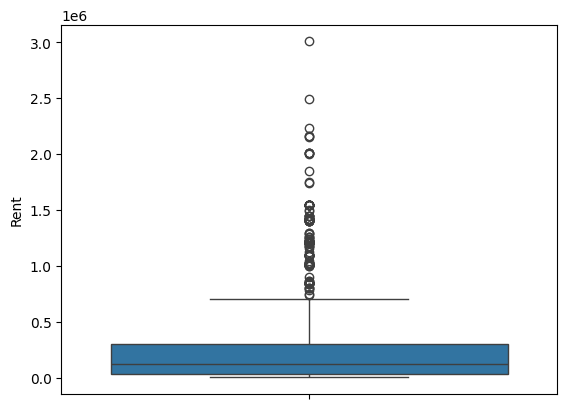

In [23]:
data = df.copy()
#data['price'] = np.log(data['price'])
sns.boxplot(data = data,y = 'price')
plt.ylabel('Rent')
plt.show()

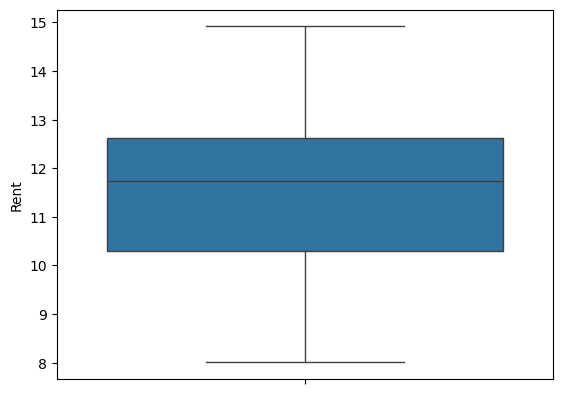

In [24]:
data = df.copy()
data['price'] = np.log(data['price'])
sns.boxplot(data = data,y = 'price')
plt.ylabel('Rent')
plt.show()

### Feature Engineering

In [25]:
#removing unwanted columns

df2 = df.copy()
df2.drop(['priceSqFt','description','city','currency'], axis=1,inplace=True)
df2.head()

,house_type,house_size,location,latitude,longitude,price,numBathrooms,numBalconies,isNegotiable,verificationDate,SecurityDeposit,Status
0,1 RK Studio Apartment,400 sq ft,Kalkaji,28.545561,77.254349,22000,1.0,NaN,NaN,Posted a day ago,No Deposit,Furnished
1,1 RK Studio Apartment,400 sq ft,Mansarover Garden,28.643259,77.132828,20000,1.0,NaN,NaN,Posted 9 days ago,No Deposit,Furnished
2,2 BHK Independent Floor,500 sq ft,Uttam Nagar,28.618677,77.053352,8500,1.0,NaN,NaN,Posted 12 days ago,No Deposit,Semi-Furnished
3,3 BHK Independent House,"1,020 sq ft",Model Town,28.712898,77.180000,48000,3.0,NaN,NaN,Posted a year ago,No Deposit,Furnished
4,2 BHK Apartment,810 sq ft,Sector 13 Rohini,28.723539,77.131424,20000,2.0,NaN,NaN,Posted a year ago,No Deposit,Unfurnished


In [26]:
## Handling missing values for categorical features
cat_nan = [feature for feature in df2.columns if df2[feature].isnull().sum() >1 and df2[feature].dtype == 'O']

for feature in cat_nan:
    df2[feature+'_'+'nan']=np.where(df2[feature].isnull(),1,0)
    df2[feature].fillna('Missing',inplace=True)

df2.head()

,house_type,house_size,location,latitude,longitude,price,numBathrooms,numBalconies,isNegotiable,verificationDate,SecurityDeposit,Status,isNegotiable_nan
0,1 RK Studio Apartment,400 sq ft,Kalkaji,28.545561,77.254349,22000,1.0,NaN,Missing,Posted a day ago,No Deposit,Furnished,1
1,1 RK Studio Apartment,400 sq ft,Mansarover Garden,28.643259,77.132828,20000,1.0,NaN,Missing,Posted 9 days ago,No Deposit,Furnished,1
2,2 BHK Independent Floor,500 sq ft,Uttam Nagar,28.618677,77.053352,8500,1.0,NaN,Missing,Posted 12 days ago,No Deposit,Semi-Furnished,1
3,3 BHK Independent House,"1,020 sq ft",Model Town,28.712898,77.180000,48000,3.0,NaN,Missing,Posted a year ago,No Deposit,Furnished,1
4,2 BHK Apartment,810 sq ft,Sector 13 Rohini,28.723539,77.131424,20000,2.0,NaN,Missing,Posted a year ago,No Deposit,Unfurnished,1


In [27]:
## Handling missing values for numerical features

num_nan=[feature for feature in df2.columns if df2[feature].isnull().sum()>1 and df[feature].dtypes!='O']

for feature in num_nan:
    df2[feature+'_'+'nan']=np.where(df2[feature].isnull(),1,0)
    df2[feature].fillna(df2[feature].median(),inplace = True)

df2.head()

,house_type,house_size,location,latitude,longitude,price,numBathrooms,numBalconies,isNegotiable,verificationDate,SecurityDeposit,Status,isNegotiable_nan,numBathrooms_nan,numBalconies_nan
0,1 RK Studio Apartment,400 sq ft,Kalkaji,28.545561,77.254349,22000,1.0,2.0,Missing,Posted a day ago,No Deposit,Furnished,1,0,1
1,1 RK Studio Apartment,400 sq ft,Mansarover Garden,28.643259,77.132828,20000,1.0,2.0,Missing,Posted 9 days ago,No Deposit,Furnished,1,0,1
2,2 BHK Independent Floor,500 sq ft,Uttam Nagar,28.618677,77.053352,8500,1.0,2.0,Missing,Posted 12 days ago,No Deposit,Semi-Furnished,1,0,1
3,3 BHK Independent House,"1,020 sq ft",Model Town,28.712898,77.180000,48000,3.0,2.0,Missing,Posted a year ago,No Deposit,Furnished,1,0,1
4,2 BHK Apartment,810 sq ft,Sector 13 Rohini,28.723539,77.131424,20000,2.0,2.0,Missing,Posted a year ago,No Deposit,Unfurnished,1,0,1


In [28]:
df2.isnull().sum()

,0
house_type,0
house_size,0
location,0
latitude,0
longitude,0
price,0
numBathrooms,0
numBalconies,0
isNegotiable,0
verificationDate,0


In [29]:
df2['bhk'] = df2['house_type'].apply(lambda x: int(x.split()[0]))

df2.head()

,house_type,house_size,location,latitude,longitude,price,numBathrooms,numBalconies,isNegotiable,verificationDate,SecurityDeposit,Status,isNegotiable_nan,numBathrooms_nan,numBalconies_nan,bhk
0,1 RK Studio Apartment,400 sq ft,Kalkaji,28.545561,77.254349,22000,1.0,2.0,Missing,Posted a day ago,No Deposit,Furnished,1,0,1,1
1,1 RK Studio Apartment,400 sq ft,Mansarover Garden,28.643259,77.132828,20000,1.0,2.0,Missing,Posted 9 days ago,No Deposit,Furnished,1,0,1,1
2,2 BHK Independent Floor,500 sq ft,Uttam Nagar,28.618677,77.053352,8500,1.0,2.0,Missing,Posted 12 days ago,No Deposit,Semi-Furnished,1,0,1,2
3,3 BHK Independent House,"1,020 sq ft",Model Town,28.712898,77.180000,48000,3.0,2.0,Missing,Posted a year ago,No Deposit,Furnished,1,0,1,3
4,2 BHK Apartment,810 sq ft,Sector 13 Rohini,28.723539,77.131424,20000,2.0,2.0,Missing,Posted a year ago,No Deposit,Unfurnished,1,0,1,2


In [30]:
df2['house_size_sqft'] = df2['house_size'].apply(lambda x: int(x.replace(',','').split()[0]))

df2.head()

,house_type,house_size,location,latitude,longitude,price,numBathrooms,numBalconies,isNegotiable,verificationDate,SecurityDeposit,Status,isNegotiable_nan,numBathrooms_nan,numBalconies_nan,bhk,house_size_sqft
0,1 RK Studio Apartment,400 sq ft,Kalkaji,28.545561,77.254349,22000,1.0,2.0,Missing,Posted a day ago,No Deposit,Furnished,1,0,1,1,400
1,1 RK Studio Apartment,400 sq ft,Mansarover Garden,28.643259,77.132828,20000,1.0,2.0,Missing,Posted 9 days ago,No Deposit,Furnished,1,0,1,1,400
2,2 BHK Independent Floor,500 sq ft,Uttam Nagar,28.618677,77.053352,8500,1.0,2.0,Missing,Posted 12 days ago,No Deposit,Semi-Furnished,1,0,1,2,500
3,3 BHK Independent House,"1,020 sq ft",Model Town,28.712898,77.180000,48000,3.0,2.0,Missing,Posted a year ago,No Deposit,Furnished,1,0,1,3,1020
4,2 BHK Apartment,810 sq ft,Sector 13 Rohini,28.723539,77.131424,20000,2.0,2.0,Missing,Posted a year ago,No Deposit,Unfurnished,1,0,1,2,810


In [31]:
df2.drop('house_size',axis=1,inplace=True)

In [32]:
df2.head()

,house_type,location,latitude,longitude,price,numBathrooms,numBalconies,isNegotiable,verificationDate,SecurityDeposit,Status,isNegotiable_nan,numBathrooms_nan,numBalconies_nan,bhk,house_size_sqft
0,1 RK Studio Apartment,Kalkaji,28.545561,77.254349,22000,1.0,2.0,Missing,Posted a day ago,No Deposit,Furnished,1,0,1,1,400
1,1 RK Studio Apartment,Mansarover Garden,28.643259,77.132828,20000,1.0,2.0,Missing,Posted 9 days ago,No Deposit,Furnished,1,0,1,1,400
2,2 BHK Independent Floor,Uttam Nagar,28.618677,77.053352,8500,1.0,2.0,Missing,Posted 12 days ago,No Deposit,Semi-Furnished,1,0,1,2,500
3,3 BHK Independent House,Model Town,28.712898,77.180000,48000,3.0,2.0,Missing,Posted a year ago,No Deposit,Furnished,1,0,1,3,1020
4,2 BHK Apartment,Sector 13 Rohini,28.723539,77.131424,20000,2.0,2.0,Missing,Posted a year ago,No Deposit,Unfurnished,1,0,1,2,810


In [33]:
cat_feature = [feature for feature in df2.columns if df2[feature].dtype == 'O']

for feature in cat_feature:
    label_ordered = df2.groupby(feature)['price'].mean().sort_values().index
    print(label_ordered)

    label_ordered = {k:i for i,k in enumerate(label_ordered, 0)}
    print(label_ordered)
    df2[feature] = df2[feature].map(label_ordered)

df2.head()

Index(['1 BHK Independent House ', '1 RK Studio Apartment ',
       '1 BHK Independent Floor ', '1 BHK Apartment ',
       '2 BHK Independent Floor ', '2 BHK Apartment ',
       '2 BHK Independent House ', '3 BHK Apartment ',
       '3 BHK Independent House ', '6 BHK penthouse ', '4 BHK Apartment ',
       '3 BHK Independent Floor ', '8 BHK Villa ', '6 BHK Independent Floor ',
       '4 BHK Independent Floor ', '7 BHK Independent House ',
       '5 BHK Independent Floor ', '5 BHK Apartment ',
       '4 BHK Independent House ', '8 BHK Independent House ', '4 BHK Villa ',
       '5 BHK Independent House ', '9 BHK Independent House ', '5 BHK Villa ',
       '10 BHK Independent House ', '7 BHK Independent Floor ',
       '8 BHK Independent Floor ', '12 BHK Independent House '],
      dtype='object', name='house_type')
{'1 BHK Independent House ': 0, '1 RK Studio Apartment ': 1, '1 BHK Independent Floor ': 2, '1 BHK Apartment ': 3, '2 BHK Independent Floor ': 4, '2 BHK Apartment ': 5, '2 BH

,house_type,location,latitude,longitude,price,numBathrooms,numBalconies,isNegotiable,verificationDate,SecurityDeposit,Status,isNegotiable_nan,numBathrooms_nan,numBalconies_nan,bhk,house_size_sqft
0,1,201,28.545561,77.254349,22000,1.0,2.0,1,20,103,0,1,0,1,1,400
1,1,196,28.643259,77.132828,20000,1.0,2.0,1,36,103,0,1,0,1,1,400
2,4,49,28.618677,77.053352,8500,1.0,2.0,1,13,103,1,1,0,1,2,500
3,8,99,28.712898,77.180000,48000,3.0,2.0,1,48,103,0,1,0,1,3,1020
4,5,108,28.723539,77.131424,20000,2.0,2.0,1,48,103,2,1,0,1,2,810


In [34]:
#Normalizing Rent

df2['price'] = np.log(df2['price'])
df2.head()

,house_type,location,latitude,longitude,price,numBathrooms,numBalconies,isNegotiable,verificationDate,SecurityDeposit,Status,isNegotiable_nan,numBathrooms_nan,numBalconies_nan,bhk,house_size_sqft
0,1,201,28.545561,77.254349,9.998798,1.0,2.0,1,20,103,0,1,0,1,1,400
1,1,196,28.643259,77.132828,9.903488,1.0,2.0,1,36,103,0,1,0,1,1,400
2,4,49,28.618677,77.053352,9.047821,1.0,2.0,1,13,103,1,1,0,1,2,500
3,8,99,28.712898,77.180000,10.778956,3.0,2.0,1,48,103,0,1,0,1,3,1020
4,5,108,28.723539,77.131424,9.903488,2.0,2.0,1,48,103,2,1,0,1,2,810


In [35]:
#Scaling the features

feature_scale = [feature for feature in df2.columns if feature != 'price']

scaler = StandardScaler()
scaler.fit(df2[feature_scale])

df_scaled = pd.concat([df2['price'].reset_index(drop=True),pd.DataFrame(scaler.transform(df2[feature_scale]), columns = feature_scale)],axis=1)
df_scaled.head()

,price,house_type,location,latitude,longitude,numBathrooms,numBalconies,isNegotiable,verificationDate,SecurityDeposit,Status,isNegotiable_nan,numBathrooms_nan,numBalconies_nan,bhk,house_size_sqft
0,9.998798,-1.708963,-0.066522,-0.170645,0.690597,-1.768653,0.061663,0.192689,-2.274060,-0.680744,-1.845657,0.192689,-0.070888,1.099753,-1.820451,-1.191122
1,9.903488,-1.708963,-0.139295,0.343105,-0.360396,-1.768653,0.061663,0.192689,-0.672398,-0.680744,-1.845657,0.192689,-0.070888,1.099753,-1.820451,-1.191122
2,9.047821,-1.183258,-2.278796,0.213840,-1.047752,-1.768653,0.061663,0.192689,-2.974788,-0.680744,-0.448702,0.192689,-0.070888,1.099753,-0.955053,-1.145007
3,10.778956,-0.482317,-1.551074,0.709306,0.047583,0.074654,0.061663,0.192689,0.528849,-0.680744,-1.845657,0.192689,-0.070888,1.099753,-0.089655,-0.905204
4,9.903488,-1.008023,-1.420084,0.765263,-0.372537,-0.847000,0.061663,0.192689,0.528849,-0.680744,0.948253,0.192689,-0.070888,1.099753,-0.955053,-1.002047


In [36]:
df_scaled.columns

Index(['price', 'house_type', 'location', 'latitude', 'longitude',
       'numBathrooms', 'numBalconies', 'isNegotiable', 'verificationDate',
       'SecurityDeposit', 'Status', 'isNegotiable_nan', 'numBathrooms_nan',
       'numBalconies_nan', 'bhk', 'house_size_sqft'],
      dtype='object')

###Feature Selection

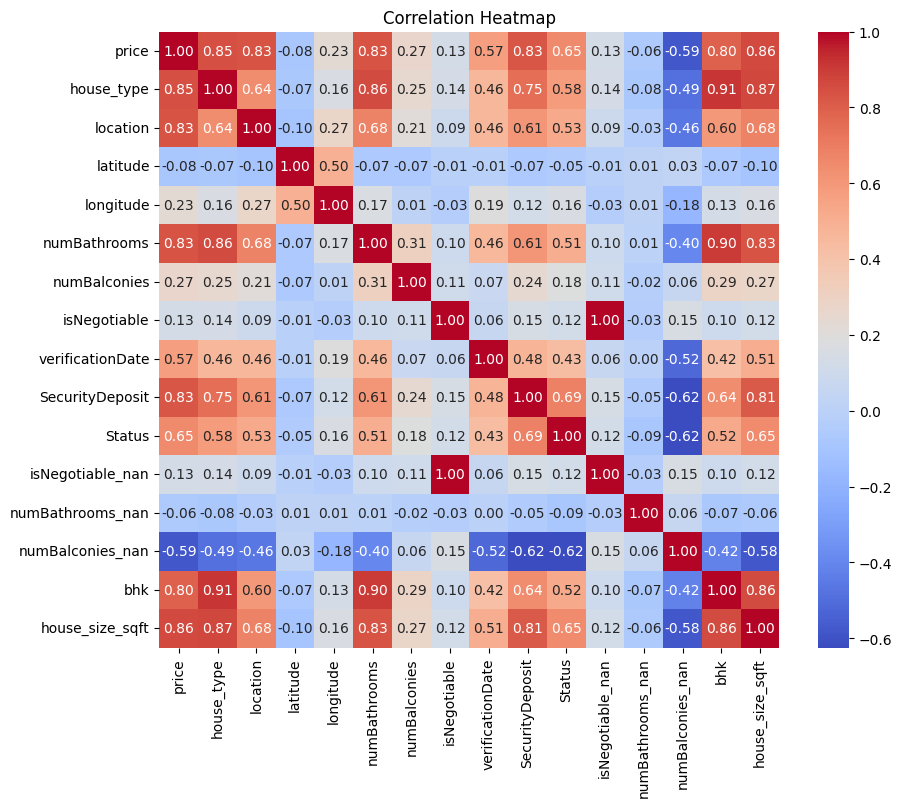

In [37]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_scaled.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [38]:
X = df_scaled.drop('price',axis=1)
y = df_scaled['price']



In [39]:
feature_selection_model = SelectFromModel(Lasso(alpha = 0.05, random_state = 0))
feature_selection_model.fit(X,y)

SelectFromModel(estimator=Lasso(alpha=0.05, random_state=0))

In [40]:
feature_selection_model.get_support()

array([ True,  True, False, False,  True, False, False,  True,  True,
       False, False, False,  True, False,  True])

In [41]:
Selected_Features = X.columns[(feature_selection_model.get_support())]
Selected_Features

Index(['house_type', 'location', 'numBathrooms', 'verificationDate',
       'SecurityDeposit', 'numBalconies_nan', 'house_size_sqft'],
      dtype='object')

Combining results of both correlation matrix and SelectFromModel the following columns will be dropped and not used for model training : **Latitude, Longitude, numBalconies, isNegotiable, isNegotiable_nan, numBathrooms_nan.**

###Model Training

In [42]:
X_final = df_scaled.drop(['latitude','longitude','numBalconies','isNegotiable','isNegotiable_nan','numBathrooms_nan','price'],axis=1)
y_final = df_scaled['price']

In [43]:
y_final

,price
0,9.998798
1,9.903488
2,9.047821
3,10.778956
4,9.903488
...,...
4995,13.837273
4996,14.253237
4997,12.614905
4998,12.614902


In [44]:
X_train,X_test,y_train,y_test = train_test_split(X_final,y_final,test_size=0.20,random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((4000, 9), (1000, 9), (4000,), (1000,))

In [45]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [46]:
def model_trainer(X_train,X_test,y_train,y_test):
  models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(),
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()}
  model_list = []
  r2_list = []

  for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)


    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')

    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)

    print('='*35)
    print('\n')

  return model_list,r2_list

In [47]:
model_list,r2_list = model_trainer(X_train,X_test,y_train,y_test)

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 0.3870
- Mean Absolute Error: 0.2945
- R2 Score: 0.9240
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.3571
- Mean Absolute Error: 0.2743
- R2 Score: 0.9319


Lasso
Model performance for Training set
- Root Mean Squared Error: 1.2090
- Mean Absolute Error: 1.0880
- R2 Score: 0.2585
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 1.1741
- Mean Absolute Error: 1.0514
- R2 Score: 0.2642


Ridge
Model performance for Training set
- Root Mean Squared Error: 0.3870
- Mean Absolute Error: 0.2945
- R2 Score: 0.9240
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.3570
- Mean Absolute Error: 0.2744
- R2 Score: 0.9320


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 0.2165
- Mean Absolute Error: 0.1336
- R2 Score: 0.9762
-----------------------

###Choosing Best Model

In [48]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
6,XGBRegressor,0.981908
7,CatBoosting Regressor,0.981569
5,Random Forest Regressor,0.977625
4,Decision Tree,0.966413
3,K-Neighbors Regressor,0.965069
8,AdaBoost Regressor,0.948610
2,Ridge,0.931953
0,Linear Regression,0.931948
1,Lasso,0.264222


In [49]:
cb_model = CatBoostRegressor(verbose=False)
cb_model = cb_model.fit(X_train, y_train)
y_pred = cb_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 98.16


### Results

Text(0, 0.5, 'Predicted')

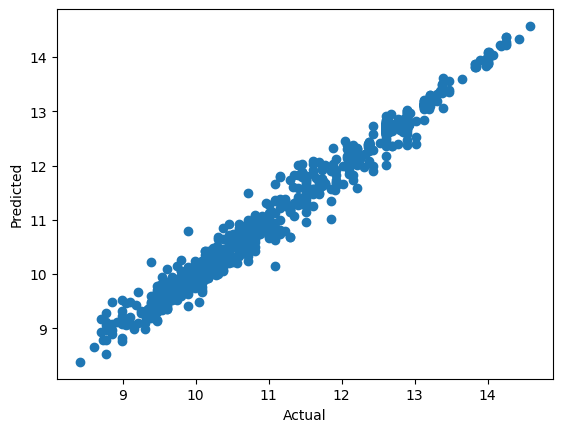

In [50]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted')

<Axes: xlabel='price'>

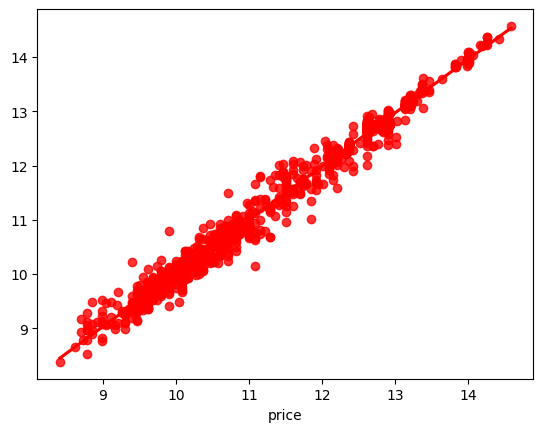

In [51]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red')

In [52]:
import joblib

# Example: Assuming 'model' is a trained scikit-learn model
joblib.dump(cb_model, 'model_weights.pkl')


['model_weights.pkl']

In [53]:
loaded_model = joblib.load('model_weights.pkl')


In [54]:
X_test

,house_type,location,numBathrooms,verificationDate,SecurityDeposit,Status,numBalconies_nan,bhk,house_size_sqft
1501,-1.358493,0.428328,-1.768653,-0.472190,-0.680744,0.948253,1.099753,-1.820451,-1.168065
2586,-1.008023,-0.867016,-1.768653,-2.474268,-1.128328,-0.448702,-0.909295,-0.955053,-1.075833
2653,0.919564,0.646645,0.996307,0.528849,1.070103,0.948253,-0.909295,1.641141,1.631636
1055,-1.008023,0.428328,-0.847000,-1.473229,-0.680744,-1.845657,1.099753,-0.955053,-0.997435
705,-0.657552,-0.430383,-0.847000,-0.772502,-0.680744,-0.448702,1.099753,-0.089655,-0.545499
...,...,...,...,...,...,...,...,...,...
4711,-1.008023,-1.172659,-0.847000,0.528849,-1.042761,-0.448702,1.099753,-0.955053,-0.960543
2313,0.569094,0.937733,0.996307,0.829161,0.813400,0.948253,-0.909295,0.775743,1.343411
3214,-1.358493,-0.910679,-1.768653,-1.773541,-1.095418,-0.448702,-0.909295,-1.820451,-1.168065
2732,1.270034,0.792189,0.996307,0.829161,2.077169,0.948253,-0.909295,0.775743,1.343411


In [55]:
y_pred = loaded_model .predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 98.16


In [57]:
verificationDate={'Posted 17 hours ago': 0, 'Posted 19 hours ago': 1, 'Posted an hour ago': 2, 'Posted 35 minutes ago': 3, 'Posted 21 days ago': 4, 'Posted 16 hours ago': 5, 'Posted 23 days ago': 6, 'Posted 21 hours ago': 7, 'Posted 4 days ago': 8, 'Posted 8 days ago': 9, 'Posted 24 days ago': 10, 'Posted 10 months ago': 11, 'Posted 25 days ago': 12, 'Posted 12 days ago': 13, 'Posted 4 years ago': 14, 'Posted 14 days ago': 15, 'Posted 6 hours ago': 16, 'Posted 9 hours ago': 17, 'Posted 22 days ago': 18, 'Posted 18 days ago': 19, 'Posted a day ago': 20, 'Posted 2 hours ago': 21, 'Posted 4 hours ago': 22, 'Posted 5 hours ago': 23, 'Posted 2 days ago': 24, 'Posted 3 months ago': 25, 'Posted 13 hours ago': 26, 'Posted 17 days ago': 27, 'Posted 6 days ago': 28, 'Posted 14 hours ago': 29, 'Posted 20 days ago': 30, 'Posted 37 minutes ago': 31, 'Posted 13 days ago': 32, 'Posted 19 days ago': 33, 'Posted a month ago': 34, 'Posted 2 years ago': 35, 'Posted 9 days ago': 36, 'Posted 11 days ago': 37, 'Posted 3 days ago': 38, 'Posted 7 days ago': 39, 'Posted 4 months ago': 40, 'Posted 3 years ago': 41, 'Posted 15 days ago': 42, 'Posted 9 months ago': 43, 'Posted 10 days ago': 44, 'Posted 5 days ago': 45, 'Posted 16 days ago': 46, 'Posted 5 years ago': 47, 'Posted a year ago': 48, 'Posted 2 months ago': 49, 'Posted 6 months ago': 50, 'Posted 5 months ago': 51}
status={'Furnished': 0, 'Semi-Furnished': 1, 'Unfurnished': 2}
location={'Sector 34 Rohini': 0, 'dda flat': 1, 'Santnagar': 2, 'Shakurpur Colony': 3, 'Burari': 4, 'Nangloi': 5, 'Haiderpur': 6, 'Dwarka 11 Sector': 7, 'Nawada': 8, 'Badarpur': 9, 'Hari Nagar': 10, 'Shahdara': 11, 'Sector 1 Dwarka': 12, 'Manglapuri': 13, 'Uttam Nagar west': 14, 'Sector 22 Rohini': 15, 'Naraina Vihar': 16, 'Kamla Nagar': 17, 'Shakti Nagar': 18, 'Sector 23B Dwarka': 19, 'Sitapuri': 20, 'Matiala': 21, 'Kishan Ganj': 22, 'Amritpuri': 23, 'Ladosarai': 24, 'Neb Sarai': 25, 'Baljeet Nagar': 26, 'Gagan Vihar': 27, 'Govindpuri': 28, 'Mandawali': 29, 'Aya Nagar': 30, 'Chattarpur Enclave': 31, 'Vipin Garden': 32, 'Chhattarpur Enclave Phase1': 33, 'Prakash Mohalla': 34, 'Rajpur Khurd Village': 35, 'Khanpur': 36, 'New Ashok Nagar': 37, 'Sarita Vihar': 38, 'Mahavir Enclave': 39, 'Sagar Pur': 40, 'Mayur Vihar 1 Extension': 41, 'Rohini sector 16': 42, 'Guru Angad Nagar': 43, 'Mahipalpur': 44, 'Chhatarpur Extension': 45, 'Rajpur Khurd Extension': 46, 'Daheli Sujanpur': 47, 'Sector 14 Dwarka': 48, 'Uttam Nagar': 49, 'Sewak Park': 50, 'SULTANPUR': 51, 'Abul Fazal Enclave Jamia Nagar': 52, 'Vishnu Garden': 53, 'New Moti Nagar': 54, 'Vinod Nagar East': 55, 'Geeta Colony': 56, 'Nangli Sakrawati': 57, 'SectorB Vasant Kunj': 58, 'Sector 23 Rohini': 59, 'Sector 16A Dwarka': 60, 'Sector 6 Rohini': 61, 'Bindapur': 62, 'Mansa Ram Park': 63, 'Dwarka Mor': 64, 'Alaknanda': 65, 'Dabri': 66, 'Block WP Poorvi Pitampura': 67, 'Rajpur': 68, 'Lajpat Nagar I': 69, 'Khushi Ram Park Delhi': 70, 'Shastri Nagar': 71, 'Razapur Khurd': 72, 'SECTOR 7 DWARKA NEW DELHI': 73, 'B 5 Block': 74, 'Block DP Poorvi Pitampura': 75, 'West Patel Nagar Road': 76, 'Shahpur Jat Village': 77, 'Fateh Nagar': 78, 'Bawana': 79, 'Govindpuri Extension': 80, 'laxmi nagar': 81, 'Khirki Extension': 82, 'Prakash Mohalla Amritpuri': 83, 'Yojna Vihar': 84, 'Moti Nagar': 85, 'Dashrath Puri': 86, 'Khirki Extension Panchsheel Vihar': 87, 'Mayur Vihar Phase II': 88, 'Dilshad Garden': 89, 'Sector 17 Dwarka': 90, 'Patel Nagar': 91, 'i p extension patparganj': 92, 'Lajpat Nagar IV': 93, 'Sector-7 Rohini': 94, 'Ajmeri Gate': 95, 'Sector 8 Dwarka': 96, 'Mayur Vihar': 97, 'Block AP Poorvi Pitampura': 98, 'Model Town': 99, 'Uttam Nagar East': 100, 'IP Extension': 101, 'Sector 14 Rohini': 102, 'Karol Bagh': 103, 'Karampura': 104, 'Jamia Nagar': 105, 'Sector 16 Dwarka': 106, 'Freedom Fighters Enclave': 107, 'Sector 13 Rohini': 108, 'PANCHSHEEL VIHAR': 109, 'Krishna Nagar': 110, 'vikaspuri': 111, 'Sector 28 Rohini': 112, 'Sector 8': 113, 'Subhash Nagar': 114, 'Mayur Vihar II': 115, 'Ramesh Nagar': 116, 'Jhil Mil Colony': 117, 'Gujranwala Town': 118, 'Dakshini Pitampura': 119, 'Zone L Dwarka': 120, 'Sector 9 Dwarka': 121, 'Sector 3 Dwarka': 122, 'Ashok Nagar': 123, 'mayur vihar phase 1': 124, 'Sector 9 Rohini': 125, 'Palam': 126, 'Vijay Nagar': 127, 'dwarka sector 12': 128, 'masoodpur': 129, 'Sector 12 Dwarka': 130, 'Tihar Village': 131, 'Sector 7 Dwarka': 132, 'Kaushambi': 133, 'Tri Nagar': 134, 'Lajpat Nagar Vinoba Puri': 135, 'Block A3': 136, 'Block E Lajpat Nagar I': 137, 'West Patel Nagar': 138, 'Block MP Poorvi Pitampura': 139, 'Mayur Vihar 2 Phase': 140, 'Vikas Puri': 141, 'Tagore Garden Extension': 142, 'Sector 11 Dwarka': 143, 'Sector-18 Dwarka': 144, 'Nirman Vihar': 145, 'Janakpuri': 146, 'Rohini Sector 9': 147, 'Sector 23 Dwarka': 148, 'Shalimar Bagh': 149, 'Sector 11 Rohini': 150, 'Patparganj': 151, 'Sector 19 Dwarka': 152, 'Lajpat Nagar III': 153, 'Inderpuri': 154, 'Paschim Vihar': 155, 'West Punjabi Bagh': 156, 'Raja garden': 157, 'Jangpura Extension': 158, 'Sector 5 Dwarka': 159, 'Sector 3 Rohini': 160, 'Sector 13 Dwarka': 161, 'Dr Mukherji Nagar': 162, 'Sector 10 Dwarka': 163, 'Malviya Nagar': 164, 'Lajpat Nagar II': 165, 'Sector 4 Dwarka': 166, 'Lajpat Nagar': 167, 'Preet Vihar': 168, 'Jasola': 169, 'Sector 11': 170, 'Block PP Poorvi Pitampura': 171, 'Prashant Vihar Sector 14': 172, 'Sector 6 Dwarka': 173, 'Kalyan Vihar': 174, 'Bali Nagar': 175, 'Sector 22 Dwarka': 176, 'Vasant Kunj Sector A': 177, 'Poorvi Pitampura': 178, 'East of Kailash': 179, 'Sector 2 Dwarka': 180, 'Anand Vihar': 181, 'Swasthya Vihar': 182, 'AGCR Enclave': 183, 'Masjid Moth Village': 184, 'Munirka': 185, 'Rajinder Nagar': 186, 'Rajouri Garden': 187, 'Pitampura': 188, 'Shakurpur': 189, 'Mehrauli': 190, 'B1 Block Paschim Vihar': 191, 'Shakurbasti': 192, 'DLF Phase 5': 193, 'Nehru Place': 194, 'Uttari Pitampura': 195, 'Mansarover Garden': 196, 'dwarka sector 17': 197, 'New Rajinder Nagar': 198, 'East Patel Nagar': 199, 'Old Rajender Nagar': 200, 'Kalkaji': 201, 'Kirti Nagar': 202, 'Kalu Sarai': 203, 'Lok Vihar': 204, 'Kohat Enclave': 205, 'Shivalik': 206, 'Engineers Enclave Harsh Vihar': 207, 'Saraswati Vihar': 208, 'Kailash Colony': 209, 'Kapil Vihar': 210, 'Naraina': 211, 'Tarun Enclave': 212, 'Surajmal Vihar': 213, 'New Rajendra Nagar': 214, 'Hemkunt Colony': 215, 'Sector-B Vasant Kunj': 216, 'Sheikh Sarai': 217, 'Ashok Vihar': 218, 'Chittaranjan Park': 219, 'C R Park': 220, 'Vaishali Dakshini Pitampura': 221, 'Gautam Nagar': 222, 'Hauz Khas Enclave': 223, 'Pitampura Vaishali': 224, 'Kailash hills': 225, 'Garhi': 226, 'Punjabi Bagh': 227, 'Nizamuddin West': 228, 'Sundar Nagar': 229, 'Safdarjung Development Area': 230, 'South Extension 2': 231, 'Sheikh Sarai Village': 232, 'Nizamuddin East': 233, 'Jangpura': 234, 'Chattarpur': 235, 'Greater Kailash': 236, 'Ansari Nagar West': 237, 'Anand Lok': 238, 'Soami Nagar': 239, 'Greater kailash 1': 240, 'Saket': 241, 'Green Park Extension': 242, 'Defence Colony': 243, 'Moti Bagh': 244, 'Safdarjung Enclave': 245, 'Vasant Kunj': 246, 'Connaught Place': 247, 'Green Park': 248, 'Sarvodaya Enclave': 249, 'Sarvpriya Vihar': 250, 'Panchsheel Enclave': 251, 'Hauz Khas': 252, 'Uday Park': 253, 'New Friends Colony': 254, 'Navjeevan Vihar': 255, 'Gulmohar park': 256, 'Anand Niketan': 257, 'Geetanjali Enclave': 258, 'Greater Kailash II': 259, 'Friends Colony': 260, 'West End': 261, 'Panchsheel Park': 262, 'Niti Bagh': 263, 'Vasant Vihar': 264, 'Maharani Bagh': 265, 'Ghitorni': 266, 'Shanti Niketan': 267, 'Sainik Farm': 268, 'Golf Links': 269, 'Jor bagh': 270, 'Sat Bari': 271, 'Sunder Nagar': 272, 'Vasant Kunj Enclave': 273, 'Westend DLF Chattarpur Farms': 274, 'DLF Farms': 275, 'Lodhi Estate': 276, 'Lodhi Gardens': 277, 'Tilak Marg': 278, 'Prithviraj Road': 279, 'Babar Road': 280, 'Tuglak Road': 281, 'Malcha Marg': 282, 'Lodhi Road': 283, 'Amrita Shergill Marg': 284, 'Aurungzeb Road': 285, 'Kasturba Gandhi Marg': 286, 'Central Ridge Reserve Forest': 287}
house_type={'1 BHK Independent House ': 0, '1 RK Studio Apartment ': 1, '1 BHK Independent Floor ': 2, '1 BHK Apartment ': 3, '2 BHK Independent Floor ': 4, '2 BHK Apartment ': 5, '2 BHK Independent House ': 6, '3 BHK Apartment ': 7, '3 BHK Independent House ': 8, '6 BHK penthouse ': 9, '4 BHK Apartment ': 10, '3 BHK Independent Floor ': 11, '8 BHK Villa ': 12, '6 BHK Independent Floor ': 13, '4 BHK Independent Floor ': 14, '7 BHK Independent House ': 15, '5 BHK Independent Floor ': 16, '5 BHK Apartment ': 17, '4 BHK Independent House ': 18, '8 BHK Independent House ': 19, '4 BHK Villa ': 20, '5 BHK Independent House ': 21, '9 BHK Independent House ': 22, '5 BHK Villa ': 23, '10 BHK Independent House ': 24, '7 BHK Independent Floor ': 25, '8 BHK Independent Floor ': 26, '12 BHK Independent House ': 27}


In [58]:

data={'house_type':'5 BHK Independent House','location':'Wadgaon Sheri', "latitude":0,"longitude":0,'numBathrooms':5,'numBalconies':5,"isNegotiable":0,
      'verificationDate':'Posted 3 years ago',
      'SecurityDeposit':100,'Status':'UnFurnished',"isNegotiable_nan":0,"numBathrooms_nan":0,"numBalconies_nan":0,'bhk':5,'house_size_sqft':5000,
     }

# Convert categorical features to numeric values
data['verificationDate'] = verificationDate.get(data['verificationDate'], -1)  # default to -1 if not found
data['Status'] = status.get(data['Status'], -1)  # default to -1 if not found
data['location'] = location.get(data['location'], -1)  # default to -1 if not found

data['house_type'] = house_type.get(data['house_type'], -1)  # default to -1 if not found

df_fs = pd.DataFrame([data])
columns_to_scale = ['house_type', 'location', 'latitude', 'longitude', 'numBathrooms',
       'numBalconies', 'isNegotiable', 'verificationDate', 'SecurityDeposit',
       'Status', 'isNegotiable_nan', 'numBathrooms_nan', 'numBalconies_nan',
       'bhk', 'house_size_sqft']

X_new_scaled = pd.DataFrame(scaler.transform(df_fs))

df2 = pd.DataFrame(X_new_scaled.values, columns=columns_to_scale)
X_final = df2.drop(['latitude','longitude','numBalconies','isNegotiable','isNegotiable_nan','numBathrooms_nan'],axis=1)

y_pred = np.exp(loaded_model .predict(X_final))

In [59]:
y_pred


array([57863.31088235])

In [338]:
data

{'house_type': -1,
 'location': -1,
 'latitude': 0,
 'longitude': 0,
 'numBathrooms': 5,
 'numBalconies': 5,
 'isNegotiable': 0,
 'verificationDate': 41,
 'SecurityDeposit': 100,
 'Status': -1,
 'isNegotiable_nan': 0,
 'numBathrooms_nan': 0,
 'numBalconies_nan': 0,
 'bhk': 5,
 'house_size_sqft': 5000}

In [ ]:
verificationDate={'Posted 17 hours ago': 0, 'Posted 19 hours ago': 1, 'Posted an hour ago': 2, 'Posted 35 minutes ago': 3, 'Posted 21 days ago': 4, 'Posted 16 hours ago': 5, 'Posted 23 days ago': 6, 'Posted 21 hours ago': 7, 'Posted 4 days ago': 8, 'Posted 8 days ago': 9, 'Posted 24 days ago': 10, 'Posted 10 months ago': 11, 'Posted 25 days ago': 12, 'Posted 12 days ago': 13, 'Posted 4 years ago': 14, 'Posted 14 days ago': 15, 'Posted 6 hours ago': 16, 'Posted 9 hours ago': 17, 'Posted 22 days ago': 18, 'Posted 18 days ago': 19, 'Posted a day ago': 20, 'Posted 2 hours ago': 21, 'Posted 4 hours ago': 22, 'Posted 5 hours ago': 23, 'Posted 2 days ago': 24, 'Posted 3 months ago': 25, 'Posted 13 hours ago': 26, 'Posted 17 days ago': 27, 'Posted 6 days ago': 28, 'Posted 14 hours ago': 29, 'Posted 20 days ago': 30, 'Posted 37 minutes ago': 31, 'Posted 13 days ago': 32, 'Posted 19 days ago': 33, 'Posted a month ago': 34, 'Posted 2 years ago': 35, 'Posted 9 days ago': 36, 'Posted 11 days ago': 37, 'Posted 3 days ago': 38, 'Posted 7 days ago': 39, 'Posted 4 months ago': 40, 'Posted 3 years ago': 41, 'Posted 15 days ago': 42, 'Posted 9 months ago': 43, 'Posted 10 days ago': 44, 'Posted 5 days ago': 45, 'Posted 16 days ago': 46, 'Posted 5 years ago': 47, 'Posted a year ago': 48, 'Posted 2 months ago': 49, 'Posted 6 months ago': 50, 'Posted 5 months ago': 51}
status={'Furnished': 0, 'Semi-Furnished': 1, 'Unfurnished': 2}
location={'Sector 34 Rohini': 0, 'dda flat': 1, 'Santnagar': 2, 'Shakurpur Colony': 3, 'Burari': 4, 'Nangloi': 5, 'Haiderpur': 6, 'Dwarka 11 Sector': 7, 'Nawada': 8, 'Badarpur': 9, 'Hari Nagar': 10, 'Shahdara': 11, 'Sector 1 Dwarka': 12, 'Manglapuri': 13, 'Uttam Nagar west': 14, 'Sector 22 Rohini': 15, 'Naraina Vihar': 16, 'Kamla Nagar': 17, 'Shakti Nagar': 18, 'Sector 23B Dwarka': 19, 'Sitapuri': 20, 'Matiala': 21, 'Kishan Ganj': 22, 'Amritpuri': 23, 'Ladosarai': 24, 'Neb Sarai': 25, 'Baljeet Nagar': 26, 'Gagan Vihar': 27, 'Govindpuri': 28, 'Mandawali': 29, 'Aya Nagar': 30, 'Chattarpur Enclave': 31, 'Vipin Garden': 32, 'Chhattarpur Enclave Phase1': 33, 'Prakash Mohalla': 34, 'Rajpur Khurd Village': 35, 'Khanpur': 36, 'New Ashok Nagar': 37, 'Sarita Vihar': 38, 'Mahavir Enclave': 39, 'Sagar Pur': 40, 'Mayur Vihar 1 Extension': 41, 'Rohini sector 16': 42, 'Guru Angad Nagar': 43, 'Mahipalpur': 44, 'Chhatarpur Extension': 45, 'Rajpur Khurd Extension': 46, 'Daheli Sujanpur': 47, 'Sector 14 Dwarka': 48, 'Uttam Nagar': 49, 'Sewak Park': 50, 'SULTANPUR': 51, 'Abul Fazal Enclave Jamia Nagar': 52, 'Vishnu Garden': 53, 'New Moti Nagar': 54, 'Vinod Nagar East': 55, 'Geeta Colony': 56, 'Nangli Sakrawati': 57, 'SectorB Vasant Kunj': 58, 'Sector 23 Rohini': 59, 'Sector 16A Dwarka': 60, 'Sector 6 Rohini': 61, 'Bindapur': 62, 'Mansa Ram Park': 63, 'Dwarka Mor': 64, 'Alaknanda': 65, 'Dabri': 66, 'Block WP Poorvi Pitampura': 67, 'Rajpur': 68, 'Lajpat Nagar I': 69, 'Khushi Ram Park Delhi': 70, 'Shastri Nagar': 71, 'Razapur Khurd': 72, 'SECTOR 7 DWARKA NEW DELHI': 73, 'B 5 Block': 74, 'Block DP Poorvi Pitampura': 75, 'West Patel Nagar Road': 76, 'Shahpur Jat Village': 77, 'Fateh Nagar': 78, 'Bawana': 79, 'Govindpuri Extension': 80, 'laxmi nagar': 81, 'Khirki Extension': 82, 'Prakash Mohalla Amritpuri': 83, 'Yojna Vihar': 84, 'Moti Nagar': 85, 'Dashrath Puri': 86, 'Khirki Extension Panchsheel Vihar': 87, 'Mayur Vihar Phase II': 88, 'Dilshad Garden': 89, 'Sector 17 Dwarka': 90, 'Patel Nagar': 91, 'i p extension patparganj': 92, 'Lajpat Nagar IV': 93, 'Sector-7 Rohini': 94, 'Ajmeri Gate': 95, 'Sector 8 Dwarka': 96, 'Mayur Vihar': 97, 'Block AP Poorvi Pitampura': 98, 'Model Town': 99, 'Uttam Nagar East': 100, 'IP Extension': 101, 'Sector 14 Rohini': 102, 'Karol Bagh': 103, 'Karampura': 104, 'Jamia Nagar': 105, 'Sector 16 Dwarka': 106, 'Freedom Fighters Enclave': 107, 'Sector 13 Rohini': 108, 'PANCHSHEEL VIHAR': 109, 'Krishna Nagar': 110, 'vikaspuri': 111, 'Sector 28 Rohini': 112, 'Sector 8': 113, 'Subhash Nagar': 114, 'Mayur Vihar II': 115, 'Ramesh Nagar': 116, 'Jhil Mil Colony': 117, 'Gujranwala Town': 118, 'Dakshini Pitampura': 119, 'Zone L Dwarka': 120, 'Sector 9 Dwarka': 121, 'Sector 3 Dwarka': 122, 'Ashok Nagar': 123, 'mayur vihar phase 1': 124, 'Sector 9 Rohini': 125, 'Palam': 126, 'Vijay Nagar': 127, 'dwarka sector 12': 128, 'masoodpur': 129, 'Sector 12 Dwarka': 130, 'Tihar Village': 131, 'Sector 7 Dwarka': 132, 'Kaushambi': 133, 'Tri Nagar': 134, 'Lajpat Nagar Vinoba Puri': 135, 'Block A3': 136, 'Block E Lajpat Nagar I': 137, 'West Patel Nagar': 138, 'Block MP Poorvi Pitampura': 139, 'Mayur Vihar 2 Phase': 140, 'Vikas Puri': 141, 'Tagore Garden Extension': 142, 'Sector 11 Dwarka': 143, 'Sector-18 Dwarka': 144, 'Nirman Vihar': 145, 'Janakpuri': 146, 'Rohini Sector 9': 147, 'Sector 23 Dwarka': 148, 'Shalimar Bagh': 149, 'Sector 11 Rohini': 150, 'Patparganj': 151, 'Sector 19 Dwarka': 152, 'Lajpat Nagar III': 153, 'Inderpuri': 154, 'Paschim Vihar': 155, 'West Punjabi Bagh': 156, 'Raja garden': 157, 'Jangpura Extension': 158, 'Sector 5 Dwarka': 159, 'Sector 3 Rohini': 160, 'Sector 13 Dwarka': 161, 'Dr Mukherji Nagar': 162, 'Sector 10 Dwarka': 163, 'Malviya Nagar': 164, 'Lajpat Nagar II': 165, 'Sector 4 Dwarka': 166, 'Lajpat Nagar': 167, 'Preet Vihar': 168, 'Jasola': 169, 'Sector 11': 170, 'Block PP Poorvi Pitampura': 171, 'Prashant Vihar Sector 14': 172, 'Sector 6 Dwarka': 173, 'Kalyan Vihar': 174, 'Bali Nagar': 175, 'Sector 22 Dwarka': 176, 'Vasant Kunj Sector A': 177, 'Poorvi Pitampura': 178, 'East of Kailash': 179, 'Sector 2 Dwarka': 180, 'Anand Vihar': 181, 'Swasthya Vihar': 182, 'AGCR Enclave': 183, 'Masjid Moth Village': 184, 'Munirka': 185, 'Rajinder Nagar': 186, 'Rajouri Garden': 187, 'Pitampura': 188, 'Shakurpur': 189, 'Mehrauli': 190, 'B1 Block Paschim Vihar': 191, 'Shakurbasti': 192, 'DLF Phase 5': 193, 'Nehru Place': 194, 'Uttari Pitampura': 195, 'Mansarover Garden': 196, 'dwarka sector 17': 197, 'New Rajinder Nagar': 198, 'East Patel Nagar': 199, 'Old Rajender Nagar': 200, 'Kalkaji': 201, 'Kirti Nagar': 202, 'Kalu Sarai': 203, 'Lok Vihar': 204, 'Kohat Enclave': 205, 'Shivalik': 206, 'Engineers Enclave Harsh Vihar': 207, 'Saraswati Vihar': 208, 'Kailash Colony': 209, 'Kapil Vihar': 210, 'Naraina': 211, 'Tarun Enclave': 212, 'Surajmal Vihar': 213, 'New Rajendra Nagar': 214, 'Hemkunt Colony': 215, 'Sector-B Vasant Kunj': 216, 'Sheikh Sarai': 217, 'Ashok Vihar': 218, 'Chittaranjan Park': 219, 'C R Park': 220, 'Vaishali Dakshini Pitampura': 221, 'Gautam Nagar': 222, 'Hauz Khas Enclave': 223, 'Pitampura Vaishali': 224, 'Kailash hills': 225, 'Garhi': 226, 'Punjabi Bagh': 227, 'Nizamuddin West': 228, 'Sundar Nagar': 229, 'Safdarjung Development Area': 230, 'South Extension 2': 231, 'Sheikh Sarai Village': 232, 'Nizamuddin East': 233, 'Jangpura': 234, 'Chattarpur': 235, 'Greater Kailash': 236, 'Ansari Nagar West': 237, 'Anand Lok': 238, 'Soami Nagar': 239, 'Greater kailash 1': 240, 'Saket': 241, 'Green Park Extension': 242, 'Defence Colony': 243, 'Moti Bagh': 244, 'Safdarjung Enclave': 245, 'Vasant Kunj': 246, 'Connaught Place': 247, 'Green Park': 248, 'Sarvodaya Enclave': 249, 'Sarvpriya Vihar': 250, 'Panchsheel Enclave': 251, 'Hauz Khas': 252, 'Uday Park': 253, 'New Friends Colony': 254, 'Navjeevan Vihar': 255, 'Gulmohar park': 256, 'Anand Niketan': 257, 'Geetanjali Enclave': 258, 'Greater Kailash II': 259, 'Friends Colony': 260, 'West End': 261, 'Panchsheel Park': 262, 'Niti Bagh': 263, 'Vasant Vihar': 264, 'Maharani Bagh': 265, 'Ghitorni': 266, 'Shanti Niketan': 267, 'Sainik Farm': 268, 'Golf Links': 269, 'Jor bagh': 270, 'Sat Bari': 271, 'Sunder Nagar': 272, 'Vasant Kunj Enclave': 273, 'Westend DLF Chattarpur Farms': 274, 'DLF Farms': 275, 'Lodhi Estate': 276, 'Lodhi Gardens': 277, 'Tilak Marg': 278, 'Prithviraj Road': 279, 'Babar Road': 280, 'Tuglak Road': 281, 'Malcha Marg': 282, 'Lodhi Road': 283, 'Amrita Shergill Marg': 284, 'Aurungzeb Road': 285, 'Kasturba Gandhi Marg': 286, 'Central Ridge Reserve Forest': 287}
house_type={'1 BHK Independent House ': 0, '1 RK Studio Apartment ': 1, '1 BHK Independent Floor ': 2, '1 BHK Apartment ': 3, '2 BHK Independent Floor ': 4, '2 BHK Apartment ': 5, '2 BHK Independent House ': 6, '3 BHK Apartment ': 7, '3 BHK Independent House ': 8, '6 BHK penthouse ': 9, '4 BHK Apartment ': 10, '3 BHK Independent Floor ': 11, '8 BHK Villa ': 12, '6 BHK Independent Floor ': 13, '4 BHK Independent Floor ': 14, '7 BHK Independent House ': 15, '5 BHK Independent Floor ': 16, '5 BHK Apartment ': 17, '4 BHK Independent House ': 18, '8 BHK Independent House ': 19, '4 BHK Villa ': 20, '5 BHK Independent House ': 21, '9 BHK Independent House ': 22, '5 BHK Villa ': 23, '10 BHK Independent House ': 24, '7 BHK Independent Floor ': 25, '8 BHK Independent Floor ': 26, '12 BHK Independent House ': 27}


In [342]:
house_type.keys()

dict_keys(['1 BHK Independent House ', '1 RK Studio Apartment ', '1 BHK Independent Floor ', '1 BHK Apartment ', '2 BHK Independent Floor ', '2 BHK Apartment ', '2 BHK Independent House ', '3 BHK Apartment ', '3 BHK Independent House ', '6 BHK penthouse ', '4 BHK Apartment ', '3 BHK Independent Floor ', '8 BHK Villa ', '6 BHK Independent Floor ', '4 BHK Independent Floor ', '7 BHK Independent House ', '5 BHK Independent Floor ', '5 BHK Apartment ', '4 BHK Independent House ', '8 BHK Independent House ', '4 BHK Villa ', '5 BHK Independent House ', '9 BHK Independent House ', '5 BHK Villa ', '10 BHK Independent House ', '7 BHK Independent Floor ', '8 BHK Independent Floor ', '12 BHK Independent House '])

In [343]:
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']

In [345]:
# Load the scaler
scaler1 = joblib.load("scaler.pkl")


In [346]:
verificationDate={'Posted 17 hours ago': 0, 'Posted 19 hours ago': 1, 'Posted an hour ago': 2, 'Posted 35 minutes ago': 3, 'Posted 21 days ago': 4, 'Posted 16 hours ago': 5, 'Posted 23 days ago': 6, 'Posted 21 hours ago': 7, 'Posted 4 days ago': 8, 'Posted 8 days ago': 9, 'Posted 24 days ago': 10, 'Posted 10 months ago': 11, 'Posted 25 days ago': 12, 'Posted 12 days ago': 13, 'Posted 4 years ago': 14, 'Posted 14 days ago': 15, 'Posted 6 hours ago': 16, 'Posted 9 hours ago': 17, 'Posted 22 days ago': 18, 'Posted 18 days ago': 19, 'Posted a day ago': 20, 'Posted 2 hours ago': 21, 'Posted 4 hours ago': 22, 'Posted 5 hours ago': 23, 'Posted 2 days ago': 24, 'Posted 3 months ago': 25, 'Posted 13 hours ago': 26, 'Posted 17 days ago': 27, 'Posted 6 days ago': 28, 'Posted 14 hours ago': 29, 'Posted 20 days ago': 30, 'Posted 37 minutes ago': 31, 'Posted 13 days ago': 32, 'Posted 19 days ago': 33, 'Posted a month ago': 34, 'Posted 2 years ago': 35, 'Posted 9 days ago': 36, 'Posted 11 days ago': 37, 'Posted 3 days ago': 38, 'Posted 7 days ago': 39, 'Posted 4 months ago': 40, 'Posted 3 years ago': 41, 'Posted 15 days ago': 42, 'Posted 9 months ago': 43, 'Posted 10 days ago': 44, 'Posted 5 days ago': 45, 'Posted 16 days ago': 46, 'Posted 5 years ago': 47, 'Posted a year ago': 48, 'Posted 2 months ago': 49, 'Posted 6 months ago': 50, 'Posted 5 months ago': 51}
status={'Furnished': 0, 'Semi-Furnished': 1, 'Unfurnished': 2}
location={'Sector 34 Rohini': 0, 'dda flat': 1, 'Santnagar': 2, 'Shakurpur Colony': 3, 'Burari': 4, 'Nangloi': 5, 'Haiderpur': 6, 'Dwarka 11 Sector': 7, 'Nawada': 8, 'Badarpur': 9, 'Hari Nagar': 10, 'Shahdara': 11, 'Sector 1 Dwarka': 12, 'Manglapuri': 13, 'Uttam Nagar west': 14, 'Sector 22 Rohini': 15, 'Naraina Vihar': 16, 'Kamla Nagar': 17, 'Shakti Nagar': 18, 'Sector 23B Dwarka': 19, 'Sitapuri': 20, 'Matiala': 21, 'Kishan Ganj': 22, 'Amritpuri': 23, 'Ladosarai': 24, 'Neb Sarai': 25, 'Baljeet Nagar': 26, 'Gagan Vihar': 27, 'Govindpuri': 28, 'Mandawali': 29, 'Aya Nagar': 30, 'Chattarpur Enclave': 31, 'Vipin Garden': 32, 'Chhattarpur Enclave Phase1': 33, 'Prakash Mohalla': 34, 'Rajpur Khurd Village': 35, 'Khanpur': 36, 'New Ashok Nagar': 37, 'Sarita Vihar': 38, 'Mahavir Enclave': 39, 'Sagar Pur': 40, 'Mayur Vihar 1 Extension': 41, 'Rohini sector 16': 42, 'Guru Angad Nagar': 43, 'Mahipalpur': 44, 'Chhatarpur Extension': 45, 'Rajpur Khurd Extension': 46, 'Daheli Sujanpur': 47, 'Sector 14 Dwarka': 48, 'Uttam Nagar': 49, 'Sewak Park': 50, 'SULTANPUR': 51, 'Abul Fazal Enclave Jamia Nagar': 52, 'Vishnu Garden': 53, 'New Moti Nagar': 54, 'Vinod Nagar East': 55, 'Geeta Colony': 56, 'Nangli Sakrawati': 57, 'SectorB Vasant Kunj': 58, 'Sector 23 Rohini': 59, 'Sector 16A Dwarka': 60, 'Sector 6 Rohini': 61, 'Bindapur': 62, 'Mansa Ram Park': 63, 'Dwarka Mor': 64, 'Alaknanda': 65, 'Dabri': 66, 'Block WP Poorvi Pitampura': 67, 'Rajpur': 68, 'Lajpat Nagar I': 69, 'Khushi Ram Park Delhi': 70, 'Shastri Nagar': 71, 'Razapur Khurd': 72, 'SECTOR 7 DWARKA NEW DELHI': 73, 'B 5 Block': 74, 'Block DP Poorvi Pitampura': 75, 'West Patel Nagar Road': 76, 'Shahpur Jat Village': 77, 'Fateh Nagar': 78, 'Bawana': 79, 'Govindpuri Extension': 80, 'laxmi nagar': 81, 'Khirki Extension': 82, 'Prakash Mohalla Amritpuri': 83, 'Yojna Vihar': 84, 'Moti Nagar': 85, 'Dashrath Puri': 86, 'Khirki Extension Panchsheel Vihar': 87, 'Mayur Vihar Phase II': 88, 'Dilshad Garden': 89, 'Sector 17 Dwarka': 90, 'Patel Nagar': 91, 'i p extension patparganj': 92, 'Lajpat Nagar IV': 93, 'Sector-7 Rohini': 94, 'Ajmeri Gate': 95, 'Sector 8 Dwarka': 96, 'Mayur Vihar': 97, 'Block AP Poorvi Pitampura': 98, 'Model Town': 99, 'Uttam Nagar East': 100, 'IP Extension': 101, 'Sector 14 Rohini': 102, 'Karol Bagh': 103, 'Karampura': 104, 'Jamia Nagar': 105, 'Sector 16 Dwarka': 106, 'Freedom Fighters Enclave': 107, 'Sector 13 Rohini': 108, 'PANCHSHEEL VIHAR': 109, 'Krishna Nagar': 110, 'vikaspuri': 111, 'Sector 28 Rohini': 112, 'Sector 8': 113, 'Subhash Nagar': 114, 'Mayur Vihar II': 115, 'Ramesh Nagar': 116, 'Jhil Mil Colony': 117, 'Gujranwala Town': 118, 'Dakshini Pitampura': 119, 'Zone L Dwarka': 120, 'Sector 9 Dwarka': 121, 'Sector 3 Dwarka': 122, 'Ashok Nagar': 123, 'mayur vihar phase 1': 124, 'Sector 9 Rohini': 125, 'Palam': 126, 'Vijay Nagar': 127, 'dwarka sector 12': 128, 'masoodpur': 129, 'Sector 12 Dwarka': 130, 'Tihar Village': 131, 'Sector 7 Dwarka': 132, 'Kaushambi': 133, 'Tri Nagar': 134, 'Lajpat Nagar Vinoba Puri': 135, 'Block A3': 136, 'Block E Lajpat Nagar I': 137, 'West Patel Nagar': 138, 'Block MP Poorvi Pitampura': 139, 'Mayur Vihar 2 Phase': 140, 'Vikas Puri': 141, 'Tagore Garden Extension': 142, 'Sector 11 Dwarka': 143, 'Sector-18 Dwarka': 144, 'Nirman Vihar': 145, 'Janakpuri': 146, 'Rohini Sector 9': 147, 'Sector 23 Dwarka': 148, 'Shalimar Bagh': 149, 'Sector 11 Rohini': 150, 'Patparganj': 151, 'Sector 19 Dwarka': 152, 'Lajpat Nagar III': 153, 'Inderpuri': 154, 'Paschim Vihar': 155, 'West Punjabi Bagh': 156, 'Raja garden': 157, 'Jangpura Extension': 158, 'Sector 5 Dwarka': 159, 'Sector 3 Rohini': 160, 'Sector 13 Dwarka': 161, 'Dr Mukherji Nagar': 162, 'Sector 10 Dwarka': 163, 'Malviya Nagar': 164, 'Lajpat Nagar II': 165, 'Sector 4 Dwarka': 166, 'Lajpat Nagar': 167, 'Preet Vihar': 168, 'Jasola': 169, 'Sector 11': 170, 'Block PP Poorvi Pitampura': 171, 'Prashant Vihar Sector 14': 172, 'Sector 6 Dwarka': 173, 'Kalyan Vihar': 174, 'Bali Nagar': 175, 'Sector 22 Dwarka': 176, 'Vasant Kunj Sector A': 177, 'Poorvi Pitampura': 178, 'East of Kailash': 179, 'Sector 2 Dwarka': 180, 'Anand Vihar': 181, 'Swasthya Vihar': 182, 'AGCR Enclave': 183, 'Masjid Moth Village': 184, 'Munirka': 185, 'Rajinder Nagar': 186, 'Rajouri Garden': 187, 'Pitampura': 188, 'Shakurpur': 189, 'Mehrauli': 190, 'B1 Block Paschim Vihar': 191, 'Shakurbasti': 192, 'DLF Phase 5': 193, 'Nehru Place': 194, 'Uttari Pitampura': 195, 'Mansarover Garden': 196, 'dwarka sector 17': 197, 'New Rajinder Nagar': 198, 'East Patel Nagar': 199, 'Old Rajender Nagar': 200, 'Kalkaji': 201, 'Kirti Nagar': 202, 'Kalu Sarai': 203, 'Lok Vihar': 204, 'Kohat Enclave': 205, 'Shivalik': 206, 'Engineers Enclave Harsh Vihar': 207, 'Saraswati Vihar': 208, 'Kailash Colony': 209, 'Kapil Vihar': 210, 'Naraina': 211, 'Tarun Enclave': 212, 'Surajmal Vihar': 213, 'New Rajendra Nagar': 214, 'Hemkunt Colony': 215, 'Sector-B Vasant Kunj': 216, 'Sheikh Sarai': 217, 'Ashok Vihar': 218, 'Chittaranjan Park': 219, 'C R Park': 220, 'Vaishali Dakshini Pitampura': 221, 'Gautam Nagar': 222, 'Hauz Khas Enclave': 223, 'Pitampura Vaishali': 224, 'Kailash hills': 225, 'Garhi': 226, 'Punjabi Bagh': 227, 'Nizamuddin West': 228, 'Sundar Nagar': 229, 'Safdarjung Development Area': 230, 'South Extension 2': 231, 'Sheikh Sarai Village': 232, 'Nizamuddin East': 233, 'Jangpura': 234, 'Chattarpur': 235, 'Greater Kailash': 236, 'Ansari Nagar West': 237, 'Anand Lok': 238, 'Soami Nagar': 239, 'Greater kailash 1': 240, 'Saket': 241, 'Green Park Extension': 242, 'Defence Colony': 243, 'Moti Bagh': 244, 'Safdarjung Enclave': 245, 'Vasant Kunj': 246, 'Connaught Place': 247, 'Green Park': 248, 'Sarvodaya Enclave': 249, 'Sarvpriya Vihar': 250, 'Panchsheel Enclave': 251, 'Hauz Khas': 252, 'Uday Park': 253, 'New Friends Colony': 254, 'Navjeevan Vihar': 255, 'Gulmohar park': 256, 'Anand Niketan': 257, 'Geetanjali Enclave': 258, 'Greater Kailash II': 259, 'Friends Colony': 260, 'West End': 261, 'Panchsheel Park': 262, 'Niti Bagh': 263, 'Vasant Vihar': 264, 'Maharani Bagh': 265, 'Ghitorni': 266, 'Shanti Niketan': 267, 'Sainik Farm': 268, 'Golf Links': 269, 'Jor bagh': 270, 'Sat Bari': 271, 'Sunder Nagar': 272, 'Vasant Kunj Enclave': 273, 'Westend DLF Chattarpur Farms': 274, 'DLF Farms': 275, 'Lodhi Estate': 276, 'Lodhi Gardens': 277, 'Tilak Marg': 278, 'Prithviraj Road': 279, 'Babar Road': 280, 'Tuglak Road': 281, 'Malcha Marg': 282, 'Lodhi Road': 283, 'Amrita Shergill Marg': 284, 'Aurungzeb Road': 285, 'Kasturba Gandhi Marg': 286, 'Central Ridge Reserve Forest': 287}
house_type={'1 BHK Independent House ': 0, '1 RK Studio Apartment ': 1, '1 BHK Independent Floor ': 2, '1 BHK Apartment ': 3, '2 BHK Independent Floor ': 4, '2 BHK Apartment ': 5, '2 BHK Independent House ': 6, '3 BHK Apartment ': 7, '3 BHK Independent House ': 8, '6 BHK penthouse ': 9, '4 BHK Apartment ': 10, '3 BHK Independent Floor ': 11, '8 BHK Villa ': 12, '6 BHK Independent Floor ': 13, '4 BHK Independent Floor ': 14, '7 BHK Independent House ': 15, '5 BHK Independent Floor ': 16, '5 BHK Apartment ': 17, '4 BHK Independent House ': 18, '8 BHK Independent House ': 19, '4 BHK Villa ': 20, '5 BHK Independent House ': 21, '9 BHK Independent House ': 22, '5 BHK Villa ': 23, '10 BHK Independent House ': 24, '7 BHK Independent Floor ': 25, '8 BHK Independent Floor ': 26, '12 BHK Independent House ': 27}

data={'house_type':'5 BHK Independent House','location':'Wadgaon Sheri', "latitude":0,"longitude":0,'numBathrooms':5,'numBalconies':5,"isNegotiable":0,
      'verificationDate':'Posted 3 years ago',
      'SecurityDeposit':100,'Status':'UnFurnished',"isNegotiable_nan":0,"numBathrooms_nan":0,"numBalconies_nan":0,'bhk':5,'house_size_sqft':5000,
     }

# Convert categorical features to numeric values
data['verificationDate'] = verificationDate.get(data['verificationDate'], -1)  # default to -1 if not found
data['Status'] = status.get(data['Status'], -1)  # default to -1 if not found
data['location'] = location.get(data['location'], -1)  # default to -1 if not found

data['house_type'] = house_type.get(data['house_type'], -1)  # default to -1 if not found

df_fs = pd.DataFrame([data])
columns_to_scale = ['house_type', 'location', 'latitude', 'longitude', 'numBathrooms',
       'numBalconies', 'isNegotiable', 'verificationDate', 'SecurityDeposit',
       'Status', 'isNegotiable_nan', 'numBathrooms_nan', 'numBalconies_nan',
       'bhk', 'house_size_sqft']

In [349]:
X_new_scaled = pd.DataFrame(scaler1.transform(df_fs))


In [350]:
X_new_scaled

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,-2.059433,-3.006517,-150.278659,-667.455717,1.917961,7.46118,-5.189698,-0.171878,-0.70049,-3.242612,-5.189698,-0.070888,-0.909295,1.641141,0.930212


In [ ]:
X_new_scaled = pd.DataFrame(scaler.transform(df_fs))

df2 = pd.DataFrame(X_new_scaled.values, columns=columns_to_scale)
X_final = df2.drop(['latitude','longitude','numBalconies','isNegotiable','isNegotiable_nan','numBathrooms_nan'],axis=1)

y_pred = np.exp(loaded_model .predict(X_final))